In [1]:
import pandas as pd
train = pd.read_csv('../data/train.csv', encoding = 'utf-8-sig')
test = pd.read_csv('../data/test.csv', encoding = 'utf-8-sig')

In [3]:
train.head()

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
0,TRAIN_00000,2023-12-31 오후 12:44,정규작업 -,맑음,1℃,30%,건축 / 건축물 / 근린생활시설,"4,892.77㎡","지상 14층, 지하 3층",떨어짐(5미터 이상 ~ 10미터 미만),없음,건축 > 철근콘크리트공사,건설자재 > 철근,설치작업,근린생활시설 / 내부,철근 / 고소,"고소작업 중 추락 위험이 있음에도 불구하고, 안전난간대, 안전고리 착용 등 안전장치...",고소작업 시 추락 위험이 있는 부위에 안전장비 설치.
1,TRAIN_00001,2023-12-30 오후 03:35,정규작업 -,맑음,10℃,90%,토목 / 터널 / 철도터널,-,-,끼임,없음,토목 > 터널공사,건설자재 > 볼트,운반작업,철도터널 / 내부,볼트 / 바닥,부주의,재발 방지 대책 마련과 안전교육 실시.
2,TRAIN_00002,2023-12-30 오후 02:30,정규작업 -,맑음,14℃,70%,건축 / 건축물 / 업무시설,"1,994.62㎡","지상 5층, 지하 0층",넘어짐(미끄러짐),없음,건축 > 철근콘크리트공사,기타 > 기타,형틀 및 목공,업무시설 / 내부,기타 / 바닥,3층 슬라브 작업시 이동중 미끄러짐,현장자재 정리와 안전관리 철저를 통한 재발 방지 대책 및 공문 발송을 통한 향후 조...
3,TRAIN_00003,2023-12-30 오후 12:00,휴일근무 -,흐림,12℃,55%,토목 / 하천 / 기타,-,-,기타,전도,토목 > 하천공사,부재 > 교각 기초,조립작업,기타 / 동산교 신축구간,교각 기초 / 바닥,"교각 기초철근 조립 중 강한 바람에 의해 기둥측 주철근이 균형을 잃고 전도되어, 하...","위험성 평가 및 교육을 통해 작업장 내 위험요인과 안전수칙을 근로자에게 전파하고, ..."
4,TRAIN_00004,2023-12-30 오전 10:00,정규작업 -,맑음,0℃,10%,건축 / 건축물 / 공동주택,"59,388.93㎡","지상 27층, 지하 3층",넘어짐(미끄러짐),없음,건축 > 해체 및 철거공사,기타 > 건설폐기물,해체작업,공동주택 / 내부,건설폐기물 / 바닥,근로자의 부주의,자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 ...


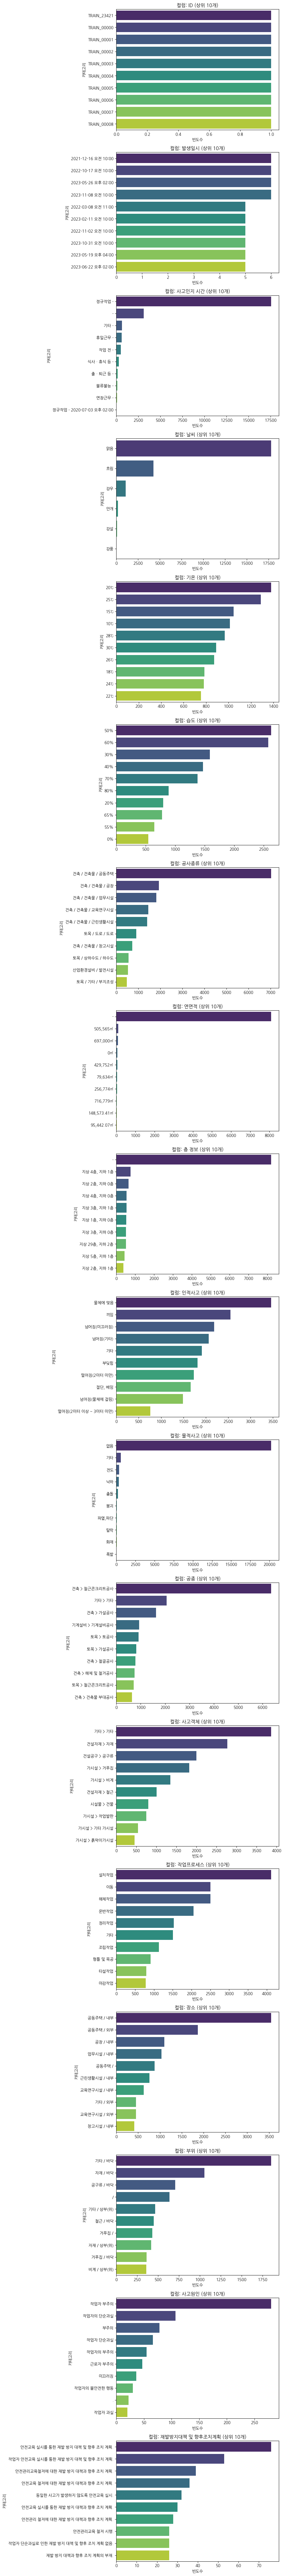

In [8]:
# 각 컬럼별 유니크한 데이터 개수 및 빈도수 계산
unique_counts = {col: train[col].value_counts() for col in train.columns if train[col].dtype == 'object'}

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 그래프 설정
num_cols = len(unique_counts)
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, 5 * num_cols))

# 각 컬럼에 대해 상위 10개 값 시각화
for i, (col, counts) in enumerate(unique_counts.items()):
    top_counts = counts.head(10)  # 상위 10개만 시각화
    sns.barplot(x=top_counts.values, y=top_counts.index, ax=axes[i], hue=top_counts.index, palette="viridis", legend=False)
    axes[i].set_title(f"컬럼: {col} (상위 10개)")
    axes[i].set_xlabel("빈도수")
    axes[i].set_ylabel("카테고리")

plt.tight_layout()
plt.show()

           사고원인_글자수    재발방지대책_글자수
count  23422.000000  23422.000000
mean      48.276151     60.187687
std       38.767421     35.060058
min        1.000000      7.000000
25%       22.000000     36.000000
50%       39.000000     51.000000
75%       64.000000     75.000000
max      738.000000    492.000000


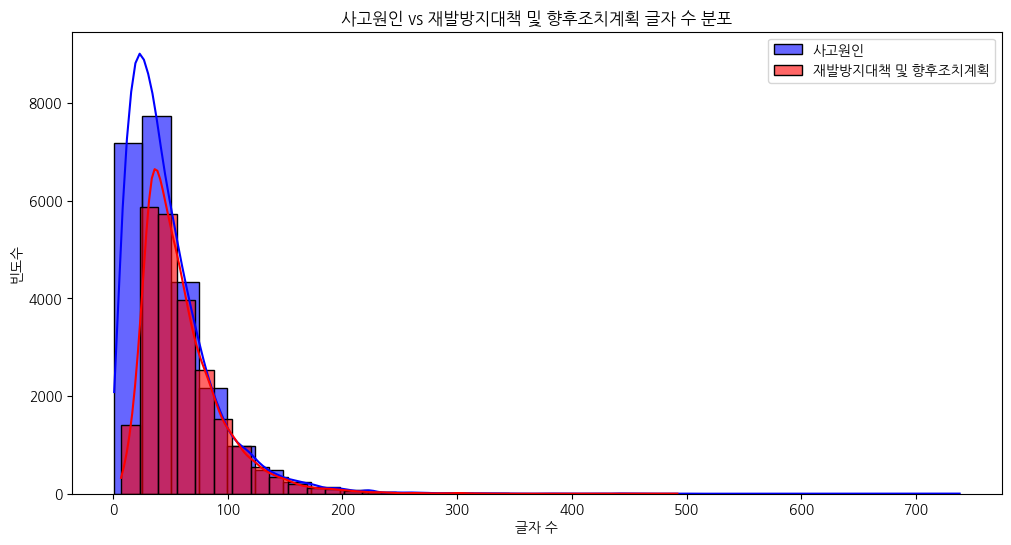

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 컬럼의 글자 수 계산
train["사고원인_글자수"] = train["사고원인"].astype(str).apply(len)
train["재발방지대책_글자수"] = train["재발방지대책 및 향후조치계획"].astype(str).apply(len)

print(train[["사고원인_글자수", "재발방지대책_글자수"]].describe())

# 히스토그램 시각화
plt.figure(figsize=(12, 6))
sns.histplot(train["사고원인_글자수"], bins=30, color="blue", label="사고원인", kde=True, alpha=0.6)
sns.histplot(train["재발방지대책_글자수"], bins=30, color="red", label="재발방지대책 및 향후조치계획", kde=True, alpha=0.6)

plt.xlabel("글자 수")
plt.ylabel("빈도수")
plt.title("사고원인 vs 재발방지대책 및 향후조치계획 글자 수 분포")
plt.legend()
plt.show()
